<a href="https://colab.research.google.com/github/MacMaurice/Kaggle_challenges/blob/main/Exercice%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

Ce notebook a pour objectif d'illustrer les concepts de base de l'Analyse en Composante Principale.
* Des données seront simulées
* Une Analyse en Composante Principale sera réalisée (et comparée avec une SVD)
* Les projections seront étudiées et visualisées

____

# IMPORTS DE LIBRAIRIES PYTHON

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import numpy as np
import random
from sklearn.decomposition import PCA

# SIMULATION DE DONNEES

## Exercice

Nous simulons un exemple simple en 2 dimesnions d'un modèle de mélange Gaussien (mixture de Gaussienne) dans $\mathbb{R}^2$.

Pour cela, nous considérons une mixture avec une densité :
$$
g(x) :\;= \sum_{k=1}^{3} w_k f_k(x,\mu_k,\Sigma_k),
$$
où $f_k(x,\mu_k,\Sigma_k)$ désigne la densité gaussienne dans $\mathbb{R}^2$ de moyenne $\mu_k$ de covariance $\Sigma_k$.
avec par exemple :

* $\mu_1 = (0,0)^T$
et
$
\Sigma_1
\begin{pmatrix}
1 & -0.99 \\
-0.99 & 1
\end{pmatrix}
$

* $\mu_2 = (2,2)^T$
et
$
\Sigma_2
\begin{pmatrix}
1 & -0.99 \\
-0.99 & 1
\end{pmatrix}
$

* $\mu_3 = (4,4)^T$
et
$
\Sigma_1
\begin{pmatrix}
1 & -0.99 \\
-0.99 & 1
\end{pmatrix}
$

## Rappel :

Un modèle de mélange peut être vu comme la loi marginale de la variable $X$ pour un couple $(Z, X)$ tel que

> 1. $Z$ est un vecteur binaire à valeur dans $\{0,1\}^K$ distribué selon la loi multinomiale d’ordre 1 et de paramètre $(w_1, . . . , w_k)$.
>
> 2. pour tout $k$, le vecteur conditionnel $(X|Z_k = 1)$ à valeur dans X est distribué selon $f_k$.

____
> **Ainsi, générer une donnée $x$ selon un modèle de mélange revient à**
> 1. **choisir l’une des composantes du mélange (la composante k est choisie avec probabilité $w_k$)** puis
> 2. **générer x selon $f_k$.**
___

## Algorithme

>For $i$ in $1 \ldots n$:
>> * Select a mixture component $k \in \{1,\ldots,K\}$ according wieights $w_1,\ldots,w_k$
>>
>>   $k \leftarrow random.choices\Big(\{1,\ldots,K\},(w_1,\ldots,w_k),1\Big)$
>> * Draw a sample $x$ following the distribution $f_k$
>>
>>   $x \leftarrow random.multivariate\_normal\Big(\mu_k,\Sigma_k,1\Big)$
>> * Store $(k,x)$

## Simuler 500 variable

In [117]:
# For reproductibility

random.seed(42)

n = 500
NumberOfMixtures = 3

w = [0.3, 0.4, 0.3]

list_Mu = [ [0,0], [2,2], [4,4]]

list_Sigma = [
    [[1, -.99], [-.99, 1]],
    [[1, -.99], [-.99, 1]],
    [[1, -.99], [-.99, 1]]
]

# Initialize lists
list_x = []
list_k = []


# LOOP
for i in range(n):
  k = random.choices(list(range(NumberOfMixtures)),weights = w, k=1)[0]
  x = np.random.multivariate_normal(list_Mu[k],list_Sigma[k],1)[0]
  list_k += [k]
  list_x += [x]

X = np.array(list_x)

-> Réprésenter les données graphiqument (plt.plot)

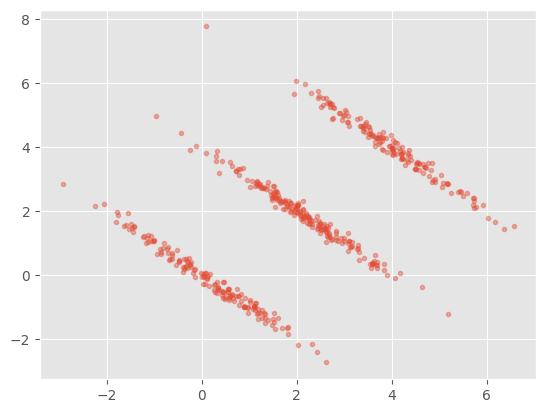

In [118]:
plt.plot(X[:,0], X[:,1],'.',alpha = 0.4)

## Projeter et Visulaiser sur chacun des axes

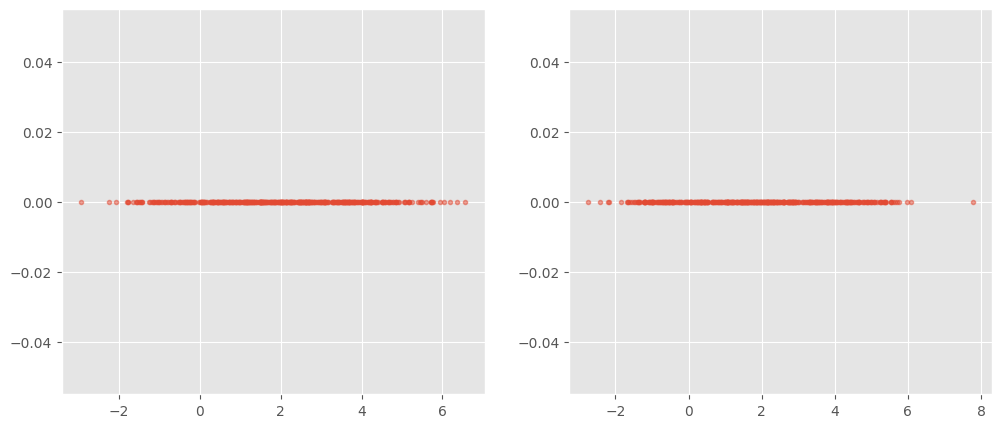

In [119]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(X[:,0], n*[0],'.', alpha = 0.5)
plt.subplot(1,2,2)
plt.plot(X[:,1], n*[0],'.', alpha = 0.5)

Tracer l'histogramme afin d'étudier la distribution des points sur les axes

(array([ 2.,  3., 13., 26., 36., 25., 38., 34., 45., 45., 49., 40., 24.,
        37., 32., 21., 19.,  8.,  2.,  0.,  0.,  1.]),
 array([-2.73746968, -2.2596887 , -1.78190771, -1.30412673, -0.82634575,
        -0.34856476,  0.12921622,  0.6069972 ,  1.08477818,  1.56255917,
         2.04034015,  2.51812113,  2.99590212,  3.4736831 ,  3.95146408,
         4.42924506,  4.90702605,  5.38480703,  5.86258801,  6.34036899,
         6.81814998,  7.29593096,  7.77371194]),
 <BarContainer object of 22 artists>)

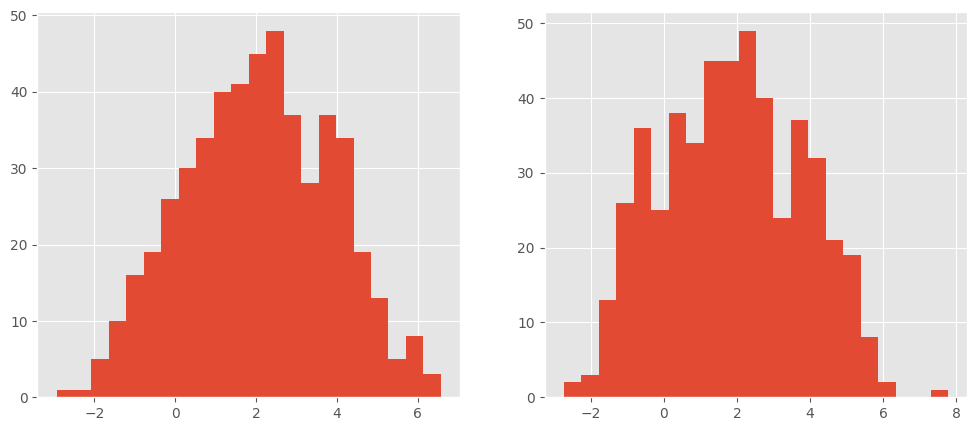

In [120]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.hist(X[:,0], bins = int(np.sqrt(n)))
plt.subplot(1,2,2)
plt.hist(X[:,1], bins = int(np.sqrt(n)))

> **Remarque**
> * Quand on projette sur chacun des axes, on ne distingue pas de groupes disjoints

# APPLICATION DE LA PCA

## Appliquer la PCA sur les données simulées

In [121]:
X_Norm = (X - np.mean(X,axis = 0))/np.std(X, axis = 0)

pca1 = PCA(n_components=1)
X_pca = pca1.fit_transform(X_Norm)

Text(0.5, 0, 'Composante Principale')

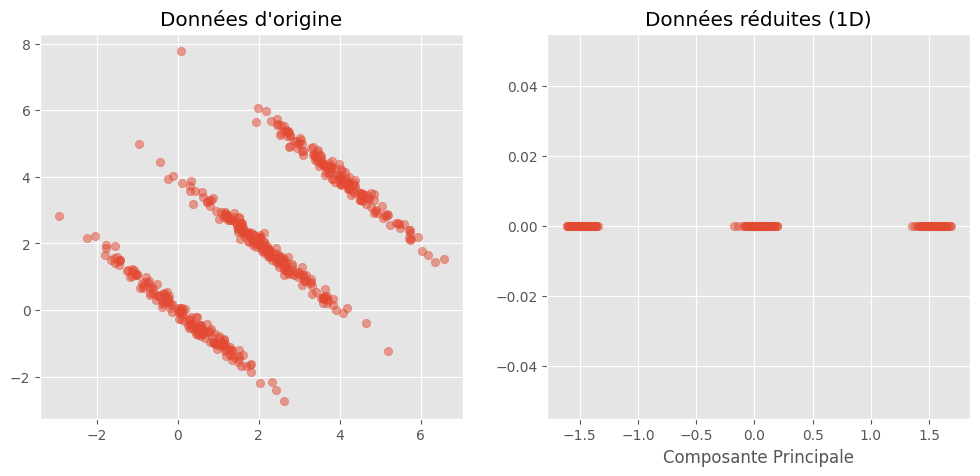

In [122]:
plt.figure(figsize=(12, 5))

# Données d'origine
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.5)
plt.title('Données d\'origine')

# Données réduites
plt.subplot(1, 2, 2)
plt.scatter(X_pca, np.zeros_like(X_pca), alpha = 0.5)
plt.title('Données réduites (1D)')
plt.xlabel('Composante Principale')

___
> /!\ **The input data is centered but not scaled for each feature before applying the PCA.**
___

## Etude de la Variance

### Calculer la matrice de Covariance de l'échantillon $X$

In [123]:
Sigma_tot = np.cov(X_Norm, rowvar = False)
Sigma_tot

array([[1.00200401, 0.43001962],
       [0.43001962, 1.00200401]])

### Calculer la somme des variances selon chaque composante de $X$

In [124]:
np.diag(Sigma_tot).sum()

2.0040080160320635

### Calculer la matrice de Covariance de l'échantillon $X_{PCA}$

In [125]:
Sigma_pca_tot = float(np.cov(X_pca, rowvar = False))
Sigma_pca_tot

1.432023626151654

### Calculer la somme des variances selon chaque composante de $X_{PCA}$

In [126]:
np.diag(Sigma_pca_tot).sum()

ValueError: ignored

## Vérifier :

* $\textbf{X}^T \; \textbf{X}\; v^j = \lambda_j v^j $, one has :

    - $\widehat{Cov}(X^j , C^{j'} ) = \frac{1}{n}  \langle X^j  , \textbf{X} \delta_{\{j=j ' \}} \rangle \;= \frac{1}{n} \sigma_j ^2\; \delta_{\{j=j ' \}}$, and,
    
    - $\widehat{Corr}(X^j , C^{j'} ) =   \frac{1}{n} \sigma_j \; \delta_{\{j=j ' \}}$

* $\widehat{Cov}(C^j , C^{j'} ) = \frac{1}{n} \;\langle \textbf{X} v^j  , \textbf{X} v^{j'} \rangle = \frac{1}{n} \sigma_j^2 \; \delta_{\{j=j ' \}}$

## Retrouver les résultats de la PCA avec une SVD

**Rappel**


____
> * Let $\textbf{X} \in \mathcal{M}(n,p)$, and assume that $X$ is centered and that the symmetric matrix $\textbf{X}^T \; \textbf{X}$ is of rank $p$. (\footnote{can ben generalized for matrix $\textbf{X}^T \; \textbf{X}$ of rank $q\leq p$})
>
> * Let <span style="color:red">$\left\{ v^1, \ldots, v^p \right\}$ be the set of orthonormal unit eigenvectors of $\textbf{X}^T \; \textbf{X}$
with associated eigenvalues $\left\{ \lambda_1 \geq \lambda_2 \ldots, \geq \lambda_p > 0 \right\}$</span> :
> $\textbf{X}^T \; \textbf{X}\; v^j = \lambda_j v^j $.
>
> * <span style="color:red">$\sigma_j :\;= \sqrt{\lambda_j}$</span>, $j=1,\ldots,p$ are positive real and called the \textit{\alert{singular values}}.
>
> *  define the vectors : <span style="color:red">$\left\{ u^1, \ldots, u^p \right\} \in \mathbb{R}^n$ such that $u^j :\;=  \frac{1}{\sigma_j} \textbf{X} v^j$</span>,
hence ($^*$) :
>	$$
	\textbf{X} v^j  =  \sigma_j \; u^j \quad , \quad
	<u^j,u^{j'}>	 =  \delta_{\{i=j ' \}} \quad \mbox{and,} \quad
	\left\| \textbf{X} v^j \right\|^2  =  \sigma_j\;.
	$$
>
> *  set : $\textbf{U} = (u^1,\ldots, u^p) \in \mathcal{M}(n,p)$, $\textbf{V} = (v^1,\ldots,v^p) \in \mathcal{M}(p,p)$,
> $\textbf{D} = diag(\sigma_1,\ldots,\sigma_p) \in \mathcal{M}(p,p)$,
> by construction, one has :
>
>	$$\begin{array}{rcl}
\textbf{X} \textbf{V} & = & \textbf{U} \textbf{D} \qquad \mbox{and}, \\
\textbf{X} & = & \textbf{U} \textbf{D}  \textbf{V}^T \quad \mbox{since  $\textbf{V}$ is orthonormal .}
\end{array}$$
>
____

___
> <p style="text-align: center;">If $\textbf{X}$ $(\textbf{X} \leftarrow \tilde{\textbf{X} })$ is centered,
<span style="color:red"> the columns of $\textbf{X} \textbf{V} = \textbf{U} \textbf{D}$ are called the principal components </span>.</p>
___

**Properties**

$\textbf{X}$ being centered, for $1\leq j \leq p$, we have :

* $C^j : \; = \textbf{X}\; v^j $ is centered,

* Since : $\textbf{X}^T \; \textbf{X}\; v^j = \lambda_j v^j $, one has :
	* $\widehat{Cov}(X^j , C^{j'} ) = \frac{1}{n}  \langle X^j  , \textbf{X} v^j \rangle \;= \frac{1}{n} \sigma_j ^2\; \delta_{\{j=j ' \}}$, and,
	* $\widehat{Corr}(X^j , C^{j'} ) =   \frac{1}{n} \sigma_j \; \delta_{\{j=j ' \}}$


* $\widehat{Cov}(C^j , C^{j'} ) = \frac{1}{n} \;\langle \textbf{X} v^j  , \textbf{X} v^{j'} \rangle = \frac{1}{n} \sigma_j^2 \; \delta_{\{j=j ' \}}$

Utiliser :
```
U, D, V = np.linalg.svd(...)
```
(/!\ après avoir centrer $X$)

In [ ]:
X_tilde = ... # Centrer X

In [ ]:
U, D, V = ... # Appliquer la SVD

In [ ]:
X_svd = U@np.diag(D)

# APPLICATION ON DATA

Cet exemple est issu du livre : [Introduction to Statistical Learning with applications in Python](https://www.statlearning.com/)

In [127]:
from sklearn.preprocessing import StandardScaler
from statsmodels.datasets import get_rdataset
from ISLP import load_data
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP.cluster import compute_linkage

In [128]:
USArrests = get_rdataset('USArrests').data

In [129]:
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Décrire statistiquement les data "USArrests"

In [130]:
USArrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [131]:
USArrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Appliquer la PCA

In [132]:
USArrests_Norm = (USArrests - np.mean(USArrests,axis = 0))/np.std(USArrests, axis = 0)

pca2 = PCA(n_components=2)

Etudier la variance expliquée

In [133]:
Cov = np.cov(USArrests,rowvar = False)
Cov_Norm = np.cov(USArrests_Norm,rowvar = False)

Calculer les composantes principales

(les appler scores)

In [137]:
scores = pca2.fit_transform(USArrests_Norm)

Représenter les composantes principales et les Etats

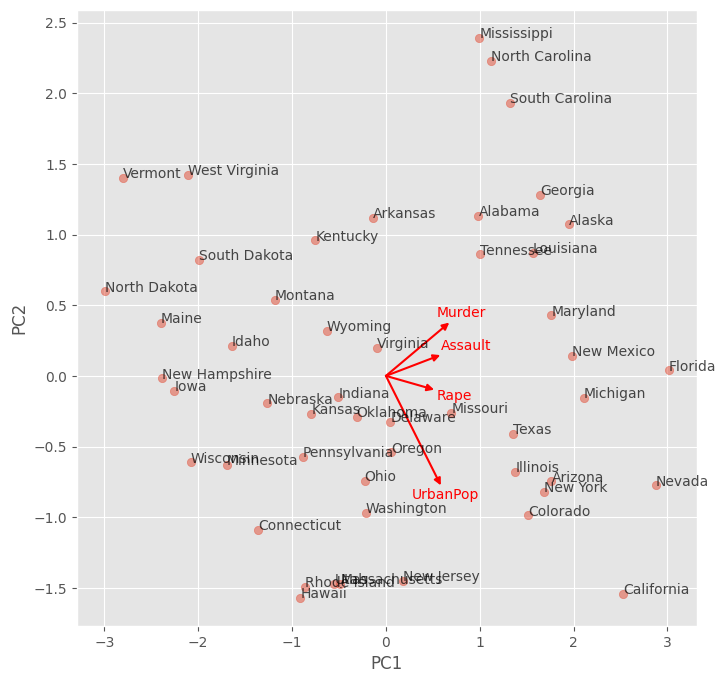

In [138]:
i, j = 0, 1 # which components
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1],alpha=0.5)

ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca2.components_.shape[1]):
    ax.annotate(USArrests.columns[k],
                xy=(0,
                    0),
                xytext=(pca2.components_[i,k],
                        pca2.components_[j,k]),
                arrowprops=dict(arrowstyle= '<|-',lw=1.5,color='red',shrinkA=0,shrinkB=0),
                color="red")
    # ax.plot([[0,0],[pcaUS.components_[i,k],pcaUS.components_[j,k]]],
    #        '->',color="red")

for i in range(USArrests.shape[0]):
    ax.text(x=scores[i,0],
            y=scores[i,1],
            s=USArrests.index[i],
            alpha=0.7)